# Part-1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import tensorflow as tf

In [5]:
x_data=np.linspace(0.0,10.0,1000000)

In [6]:
noise=np.random.randn(len(x_data))

y=mx+c

b=5

In [7]:
y_true=(0.5*x_data)+5+noise

In [8]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])

In [9]:
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [10]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df.head()

,Y
0,5.146420
1,4.645216
2,5.212274
3,6.270807
4,3.222175


In [12]:
my_data=pd.concat([x_df,y_df],axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,5.146420
1,0.00001,4.645216
2,0.00002,5.212274
3,0.00003,6.270807
4,0.00004,3.222175


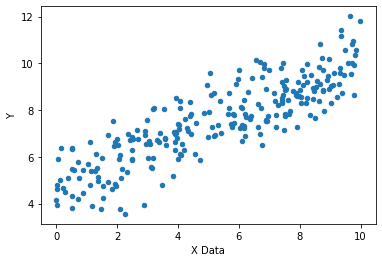

In [15]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [16]:
batch_size=8

In [17]:
np.random.randn(2)

array([ 0.56612378, -1.15822048])

In [18]:
m=tf.Variable(0.5)
b=tf.Variable(0.17)

In [19]:
xph=tf.placeholder(tf.float32,[batch_size])

In [20]:
yph=tf.placeholder(tf.float32,[batch_size])

In [21]:
y_model=m*xph+b

In [22]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [25]:
init=tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])    

In [29]:
model_m

0.56212145

In [30]:
model_b

4.895935

In [31]:
y_hat=x_data*model_m+model_b

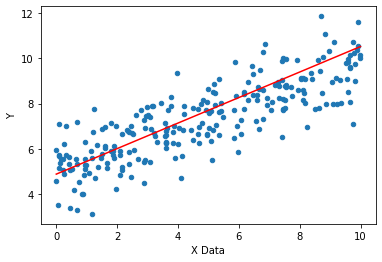

In [33]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r' )

# TF Estimator

In [34]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [36]:
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\satya\\AppData\\Local\\Temp\\tmpblhy_lxt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FF508B3AC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [39]:
print(x_train.shape)

(700000,)


In [40]:
x_eval.shape

(300000,)

In [42]:
input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                              
                     y_train,batch_size=8,num_epochs=None,shuffle=True)

In [43]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                              
                     y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [44]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},
                                              
                     y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [45]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\satya\AppD

In [46]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-09T22:48:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\satya\AppData\Local\Temp\tmpblhy_lxt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-09-22:48:42
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0937237, global_step = 1000, label/mean = 7.494655, loss = 8.749789, prediction/mean = 7.4460726
INFO:tensorflow:Saving 'checkpoint_path

In [47]:
eval_matrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-09T22:50:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\satya\AppData\Local\Temp\tmpblhy_lxt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-09-22:50:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0941474, global_step = 1000, label/mean = 7.4715447, loss = 8.75318, prediction/mean = 7.4247828
INFO:tensorflow:Saving 'checkpoint_path

In [48]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0937237, 'label/mean': 7.494655, 'loss': 8.749789, 'prediction/mean': 7.4460726, 'global_step': 1000}


In [50]:
print('EVAL MATRICS')
print(eval_matrics)

EVAL MATRICS
{'average_loss': 1.0941474, 'label/mean': 7.4715447, 'loss': 8.75318, 'prediction/mean': 7.4247828, 'global_step': 1000}


In [51]:
brand_new_data=np.linspace(0,10,10)

In [52]:
input_fn_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [53]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\satya\AppData\Local\Temp\tmpblhy_lxt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4985194], dtype=float32)},
 {'predictions': array([5.1532364], dtype=float32)},
 {'predictions': array([5.807954], dtype=float32)},
 {'predictions': array([6.462671], dtype=float32)},
 {'predictions': array([7.117388], dtype=float32)},
 {'predictions': array([7.7721047], dtype=float32)},
 {'predictions': array([8.426822], dtype=float32)},
 {'predictions': array([9.081539], dtype=float32)},
 {'predictions': array([9.736257], dtype=float32)},
 {'predictions': array([10.390973], dtype=float32)}]

In [55]:
predictions=[]

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\satya\AppData\Local\Temp\tmpblhy_lxt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
predictions

[array([4.4985194], dtype=float32),
 array([5.1532364], dtype=float32),
 array([5.807954], dtype=float32),
 array([6.462671], dtype=float32),
 array([7.117388], dtype=float32),
 array([7.7721047], dtype=float32),
 array([8.426822], dtype=float32),
 array([9.081539], dtype=float32),
 array([9.736257], dtype=float32),
 array([10.390973], dtype=float32)]

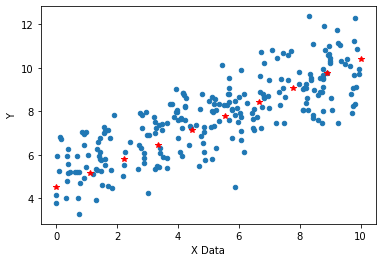

In [58]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')